# Analyzing the Meson Sector Spectrum of $N_c=3$ QCD in 1+1 Dimensions

## By Rachel Houtz and James Ingoldby

## Date: August 13th, 2025

In [1]:
import os
import time
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigsh

In [3]:
# Import saved matrices and basis objects

# Replace with the filename you want
filename = os.path.join("Hams", "qcdhamE6L8Nc3B0.npz")

# Load the .npz file
with np.load(filename, allow_pickle=True) as data:
    # Load basis
    basis = data['basis'].tolist()  # Convert back to Python list

    # Reconstruct H0
    H0 = csr_matrix((data['H0_data'], data['H0_indices'], data['H0_indptr']),
                    shape=tuple(data['H0_shape']))

    # Reconstruct lower triangular part of V
    Vlow = csr_matrix((data['V_data'], data['V_indices'], data['V_indptr']),
                   shape=tuple(data['V_shape']))
    
    # Reconstruct the full interaction
    V = Vlow + Vlow.T

# Now H0 and V are usable sparse matrices, and basis is a standard Python list
print(f"Loaded basis with {len(basis.stateList)} states")
print(f"H0 shape: {H0.shape}, nnz: {H0.nnz}")
print(f"V shape: {V.shape}, nnz: {V.nnz}")

Loaded basis with 88873 states
H0 shape: (88873, 88873), nnz: 88872
V shape: (88873, 88873), nnz: 20057242


In [4]:
# Compute the spectrum and check it looks reasonable
L = basis.L
g = 1.2 # Coupling constant

H = H0 + (g**2*L/2) * V

which = 'SA'
k = 10
print("Computing Spectrum:")
start = time.time()
spectrum = eigsh(H, k=k, which=which, return_eigenvectors=False)
ex_time = time.time() - start
print(f"Time taken is: {ex_time}")

# Output gaps
ordered = np.sort(spectrum)
gaps = ordered - ordered[0]
print("Lowest gaps:")
print(gaps)

Computing Spectrum:
Time taken is: 8.81676697731018
Lowest gaps:
[0.         0.37565149 1.07673036 1.34183469 1.39400322 1.75743213
 1.89406987 2.00818452 2.07139875 2.16713052]


In [5]:
# Extracting submatrices:

energies = H0.diagonal()
# Define functions to pull out from H0 and V the elements between low energy states
def extract_submatrix(H, Emax):
    """Extracts the submatrix of H with eigenvalues less than Emax."""
    indices = np.where(energies < Emax)[0]
    return H[indices][:, indices]

## Plot Spectrum vs Emax at Weak Coupling

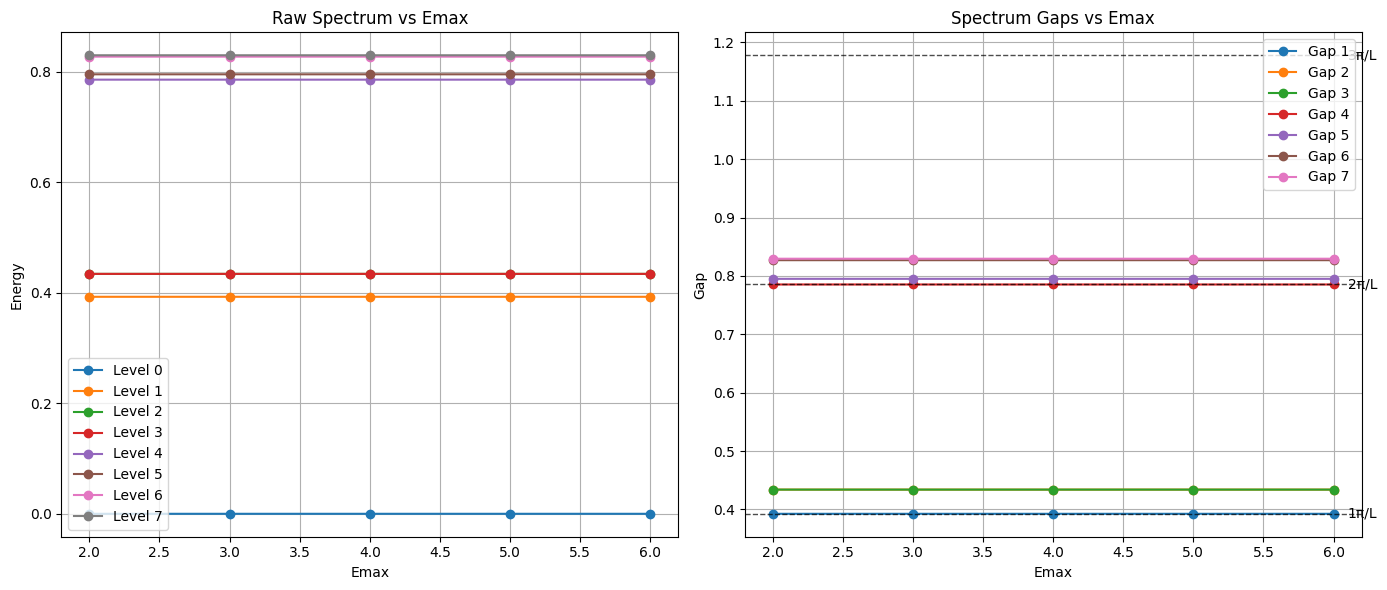

In [6]:
g = 0.1  # Weak coupling
L = basis.L

# Example values (replace with your own if needed)
emax_list = range(2, 7)
k = 8  # number of eigenvalues to compute
which = 'SA'  # or whatever you use ('SA' = smallest algebraic)

# Prepare arrays to store the spectra
spec_array = np.zeros((len(emax_list), k))

for i, Emax in enumerate(emax_list):
    H0_sub = extract_submatrix(H0, Emax)
    V_sub = extract_submatrix(V, Emax)
    H_sub = H0_sub + (g**2 * L / 2) * V_sub

    spectrum_sub = eigsh(H_sub, k=k, which=which, return_eigenvectors=False)
    spec_array[i] = np.sort(spectrum_sub)  # Sort to make plots cleaner

# Compute gaps relative to lowest energy level
gaps_array = spec_array - spec_array[:, 0][:, np.newaxis]
gaps_array = gaps_array[:, 1:]  # Exclude zero gap

# Create two-panel plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# --- Left Panel: Raw spectrum
for i in range(spec_array.shape[1]):
    ax1.plot(emax_list, spec_array[:, i], marker='o', label=f'Level {i}')
ax1.set_title('Raw Spectrum vs Emax')
ax1.set_xlabel('Emax')
ax1.set_ylabel('Energy')
ax1.grid(True)
ax1.legend()

# --- Right Panel: Gaps
for i in range(gaps_array.shape[1]):
    ax2.plot(emax_list, gaps_array[:, i], marker='o', label=f'Gap {i+1}')
# Plot expected free scalar gaps as horizontal dashed lines
free_gaps = [np.pi / L * n for n in range(1, 4)]
for gap in free_gaps:
    ax2.axhline(gap, linestyle='--', color='black', linewidth=1, alpha=0.7)

# Optionally, annotate the lines
for n, gap in enumerate(free_gaps, 1):
    ax2.text(emax_list[-1] + 0.1, gap, f'{n}π/L', color='black', va='center')

ax2.set_title('Spectrum Gaps vs Emax')
ax2.set_xlabel('Emax')
ax2.set_ylabel('Gap')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


## Plot Spectrum and Gaps vs Emax at Moderate Coupling

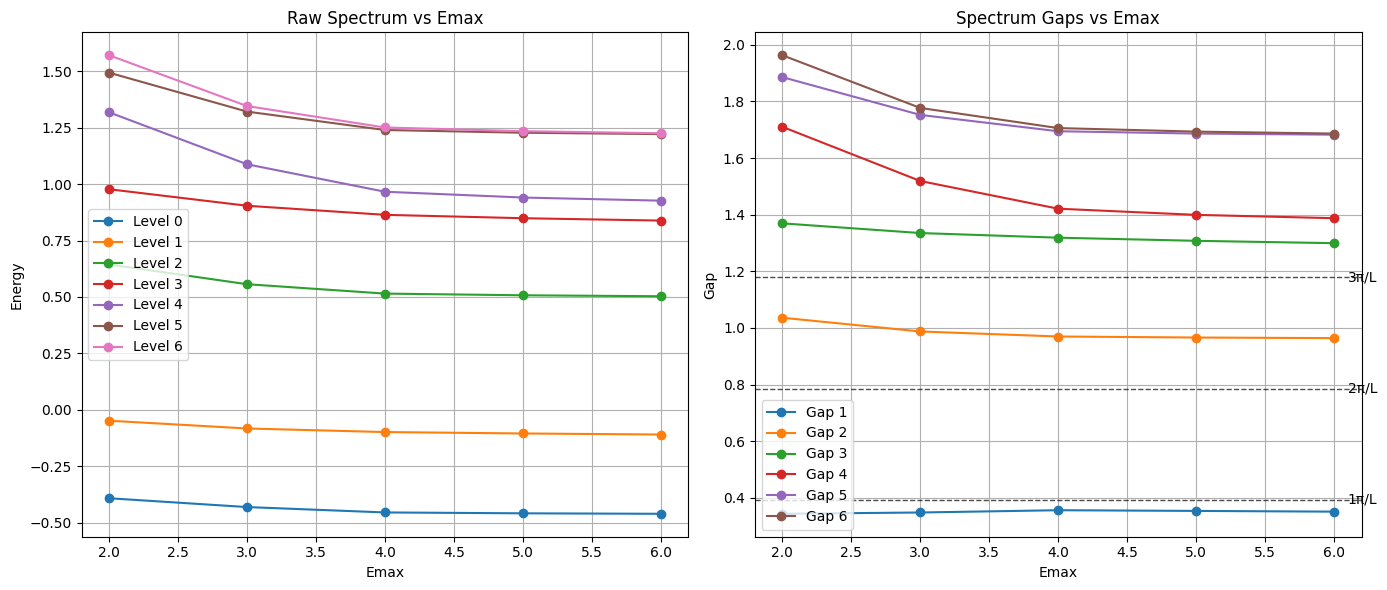

In [7]:
g = 1.0  # Moderate coupling
L = basis.L

# Example values (replace with your own if needed)
emax_list = range(2, 7)
k = 7  # number of eigenvalues to compute
which = 'SA'  # or whatever you use ('SA' = smallest algebraic)

# Prepare arrays to store the spectra
spec_array = np.zeros((len(emax_list), k))

for i, Emax in enumerate(emax_list):
    H0_sub = extract_submatrix(H0, Emax)
    V_sub = extract_submatrix(V, Emax)
    H_sub = H0_sub + (g**2 * L / 2) * V_sub

    spectrum_sub = eigsh(H_sub, k=k, which=which, return_eigenvectors=False)
    spec_array[i] = np.sort(spectrum_sub)  # Sort to make plots cleaner

# Compute gaps relative to lowest energy level
gaps_array = spec_array - spec_array[:, 0][:, np.newaxis]
gaps_array = gaps_array[:, 1:]  # Exclude zero gap

# Create two-panel plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# --- Left Panel: Raw spectrum
for i in range(spec_array.shape[1]):
    ax1.plot(emax_list, spec_array[:, i], marker='o', label=f'Level {i}')
ax1.set_title('Raw Spectrum vs Emax')
ax1.set_xlabel('Emax')
ax1.set_ylabel('Energy')
ax1.grid(True)
ax1.legend()

# --- Right Panel: Gaps
for i in range(gaps_array.shape[1]):
    ax2.plot(emax_list, gaps_array[:, i], marker='o', label=f'Gap {i+1}')
# Plot expected free scalar gaps as horizontal dashed lines
free_gaps = [np.pi / L * n for n in range(1, 4)]
for gap in free_gaps:
    ax2.axhline(gap, linestyle='--', color='black', linewidth=1, alpha=0.7)

# Optionally, annotate the lines
for n, gap in enumerate(free_gaps, 1):
    ax2.text(emax_list[-1] + 0.1, gap, f'{n}π/L', color='black', va='center')

ax2.set_title('Spectrum Gaps vs Emax')
ax2.set_xlabel('Emax')
ax2.set_ylabel('Gap')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()
